<a href="https://colab.research.google.com/github/ZaichenkoNA/Stat_Prac/blob/main/Proekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

credits_df = pd.read_csv("credits.csv", low_memory=False)
titles_df = pd.read_csv("titles.csv", low_memory=False)

print(credits_df.head())
print(titles_df.head())

   person_id       id             name                character   role
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                      Tom  ACTOR
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent

In [2]:
print(credits_df.info())
print(titles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64 

In [3]:

print(titles_df.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        

Проверим отсутствующие данные:

In [4]:
credits_df.isna().sum()


person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [5]:
titles_df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Обработка данных:

In [6]:
import numpy as np

# Подсчет популярности актеров
actor_counts = credits_df["name"].value_counts()
credits_df["actor_popularity"] = credits_df["name"].map(actor_counts)

# Фичи по актерам
actor_popularity_per_movie = credits_df.groupby("id")["actor_popularity"].mean().reset_index()
actor_popularity_per_movie.rename(columns={"actor_popularity": "avg_actor_popularity"}, inplace=True)

actor_count_per_movie = credits_df.groupby("id")["person_id"].count().reset_index()
actor_count_per_movie.rename(columns={"person_id": "num_actors"}, inplace=True)

top_100_actors = set(actor_counts.head(100).index)
credits_df["has_top_actor"] = credits_df["name"].isin(top_100_actors)
top_actor_flag_per_movie = credits_df.groupby("id")["has_top_actor"].max().reset_index()

In [7]:
# Объединяем с основной таблицей
titles_df = titles_df.merge(actor_popularity_per_movie, on="id", how="left")
titles_df = titles_df.merge(actor_count_per_movie, on="id", how="left")
titles_df = titles_df.merge(top_actor_flag_per_movie, on="id", how="left")

In [8]:
# Заполнение пропусков (присваиваем результат обратно в столбцы)
titles_df["avg_actor_popularity"] = titles_df["avg_actor_popularity"].fillna(0)
titles_df["num_actors"] = titles_df["num_actors"].fillna(0)
titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)
titles_df["runtime"] = titles_df["runtime"].fillna(titles_df["runtime"].median())
titles_df["tmdb_popularity"] = titles_df["tmdb_popularity"].fillna(0)
titles_df["imdb_votes"] = titles_df["imdb_votes"].fillna(0)

C:\Users\kira_\AppData\Local\Temp\ipykernel_12024\683364970.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)


In [9]:
# Обработка жанров (one-hot encoding)
genres_exploded = titles_df["genres"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_genres = set([g for sublist in genres_exploded.dropna() for g in sublist])

# Формируем DataFrame с бинарными признаками для каждого жанра
genre_df = pd.DataFrame({
    f"genre_{genre}": genres_exploded.apply(lambda x: genre in x if isinstance(x, list) else False)
    for genre in unique_genres
})
titles_df = pd.concat([titles_df, genre_df], axis=1)

In [10]:
# Обработка стран (one-hot encoding)
countries_exploded = titles_df["production_countries"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_countries = set([c for sublist in countries_exploded.dropna() for c in sublist])
country_df = pd.DataFrame({
    f"country_{country}": countries_exploded.apply(lambda x: country in x if isinstance(x, list) else False)
    for country in unique_countries
})
titles_df = pd.concat([titles_df, country_df], axis=1)

titles_df = titles_df.dropna(subset=["imdb_score"])
print("Предобработка завершена!")

Предобработка завершена!


Найдём распределения:

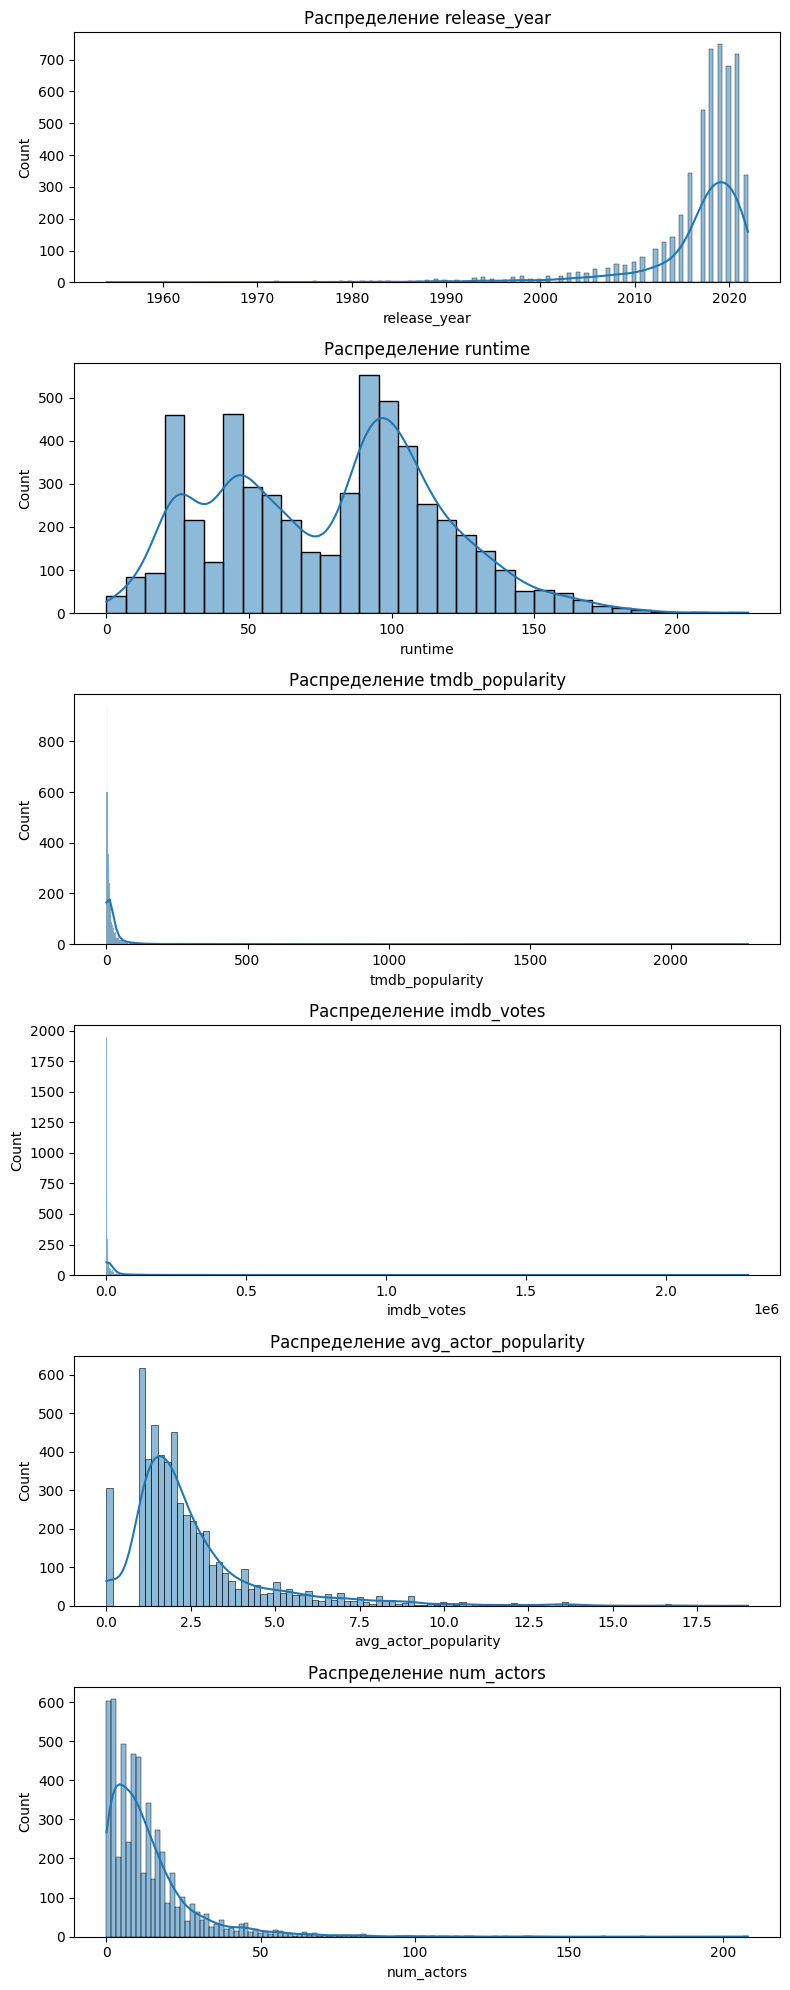

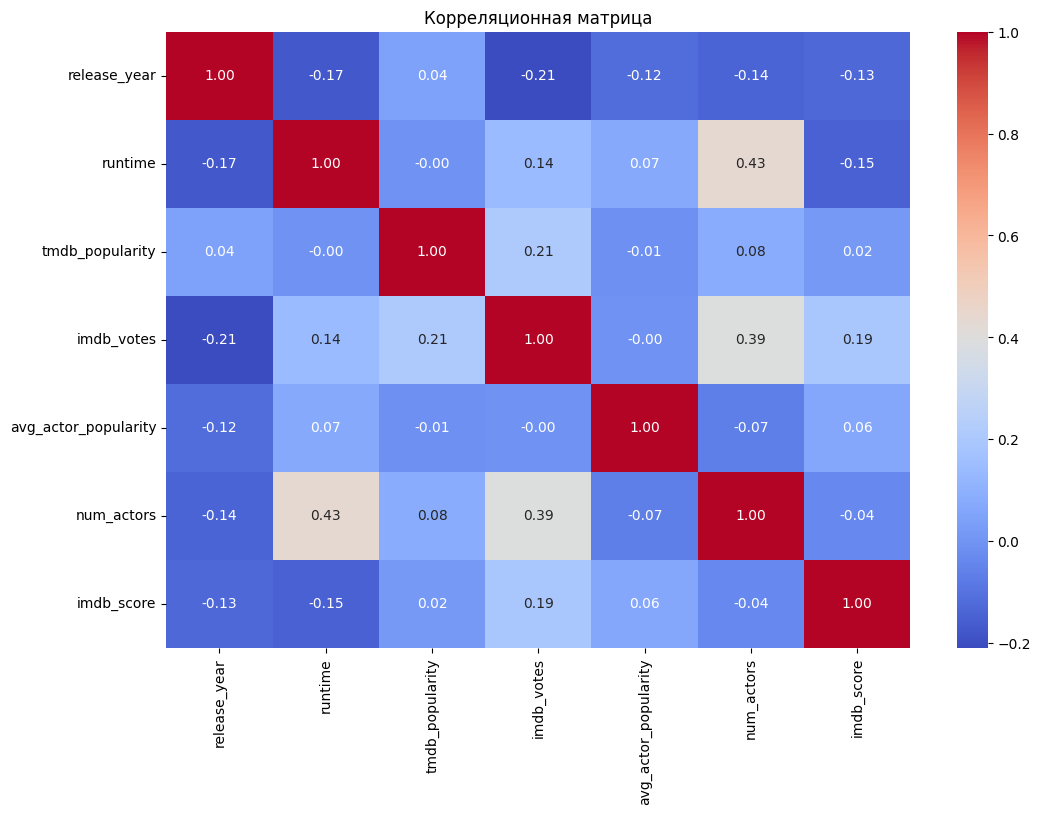

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Числовые признаки
numeric_features = ["release_year", "runtime", "tmdb_popularity", "imdb_votes", "avg_actor_popularity", "num_actors"]

# Гистограммы
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(8, 20))
for i, feature in enumerate(numeric_features):
    sns.histplot(titles_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Распределение {feature}")
plt.tight_layout()
plt.show()

# Корреляционная матрица
corr_matrix = titles_df[numeric_features + ["imdb_score"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Графики для распределений tmdb_popularity и imdb_votes выглядят не очень читаемыми. Давайте ограничим ось х, чтобы увидеть, что происходит с количеством фильмов ближе к 0 по оси х:

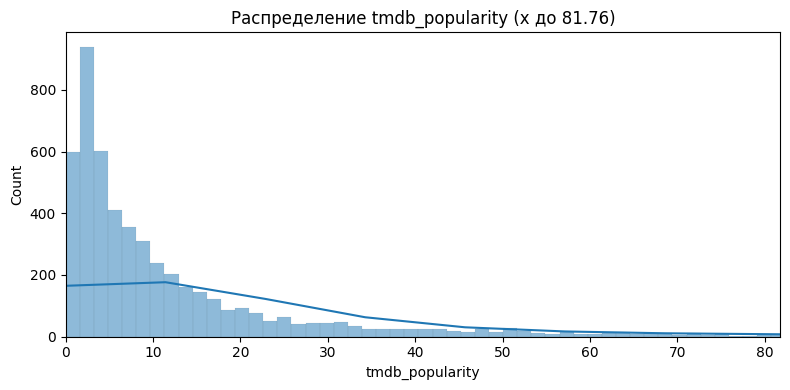

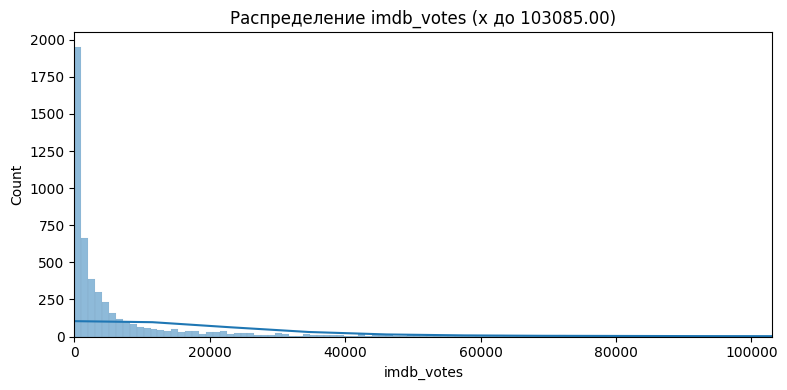

In [12]:
def plot_limited_hist(feature, quantile=0.95):
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(titles_df[feature], kde=True)
    upper_lim = titles_df[feature].quantile(quantile)
    ax.set_xlim(0, upper_lim)
    ax.set_title(f"Распределение {feature} (x до {upper_lim:.2f})")
    ax.set_xlabel(feature)
    plt.tight_layout()
    plt.show()

# Построение гистограмм для tmdb_popularity и imdb_votes с ограничением оси x
plot_limited_hist("tmdb_popularity", quantile=0.95)
plot_limited_hist("imdb_votes", quantile=0.95)

Посмотрим на рейтинг по странам:

C:\Users\kira_\AppData\Local\Temp\ipykernel_12024\569035096.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


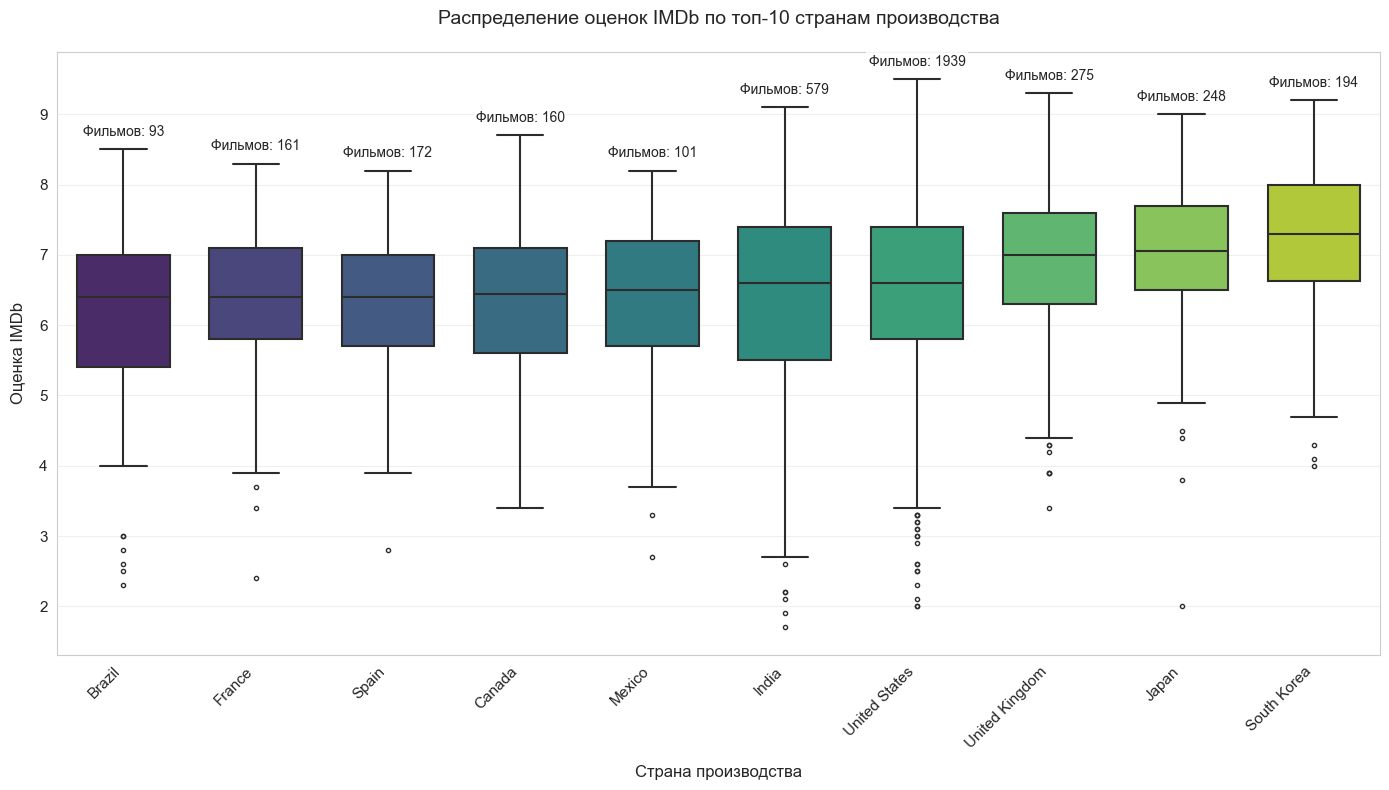

In [13]:
import pycountry

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Функция для преобразования кодов стран в полные названия
def extract_and_convert_country(raw_str):
    if not isinstance(raw_str, str):  # Проверяем, что это строка
        return None
    cleaned = raw_str.strip("[]").replace("'", "").replace("\"", "").strip()
    if not cleaned:
        return None
    codes = [code.strip() for code in cleaned.split(",") if code.strip()]
    if not codes:
        return None
    code = codes[0]
    country = pycountry.countries.get(alpha_2=code.upper())
    return country.name if country else None

titles_df["production_countries_full"] = titles_df["production_countries"].apply(extract_and_convert_country)

valid_titles = titles_df[titles_df["production_countries_full"].notnull()]
filtered_titles = valid_titles.copy()
# Заменяем название Южной Кореи на более короткое
filtered_titles["production_countries_full"] = filtered_titles["production_countries_full"].replace(
    "Korea, Republic of", "South Korea")

# Выбираем топ-10 стран по количеству фильмов
top_countries = filtered_titles["production_countries_full"].value_counts().head(10).index
filtered_df = filtered_titles[filtered_titles["production_countries_full"].isin(top_countries)]

# Сортируем страны по медианному значению IMDb
country_order = filtered_df.groupby("production_countries_full")["imdb_score"].median().sort_values().index

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x="production_countries_full",
    y="imdb_score",
    data=filtered_df,
    order=country_order,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    fliersize=3
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Страна производства", fontsize=12, labelpad=10)
plt.ylabel("Оценка IMDb", fontsize=12, labelpad=10)
plt.title("Распределение оценок IMDb по топ-10 странам производства", fontsize=14, pad=20)

# Добавляем аннотации с количеством фильмов
counts = filtered_df["production_countries_full"].value_counts().loc[country_order]
max_scores = filtered_df.groupby("production_countries_full")["imdb_score"].max().loc[country_order]

for i, country in enumerate(country_order):
    count = counts[country]
    y_pos = max_scores[country] + 0.15
    ax.text(
        i, y_pos, f"Фильмов: {count}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

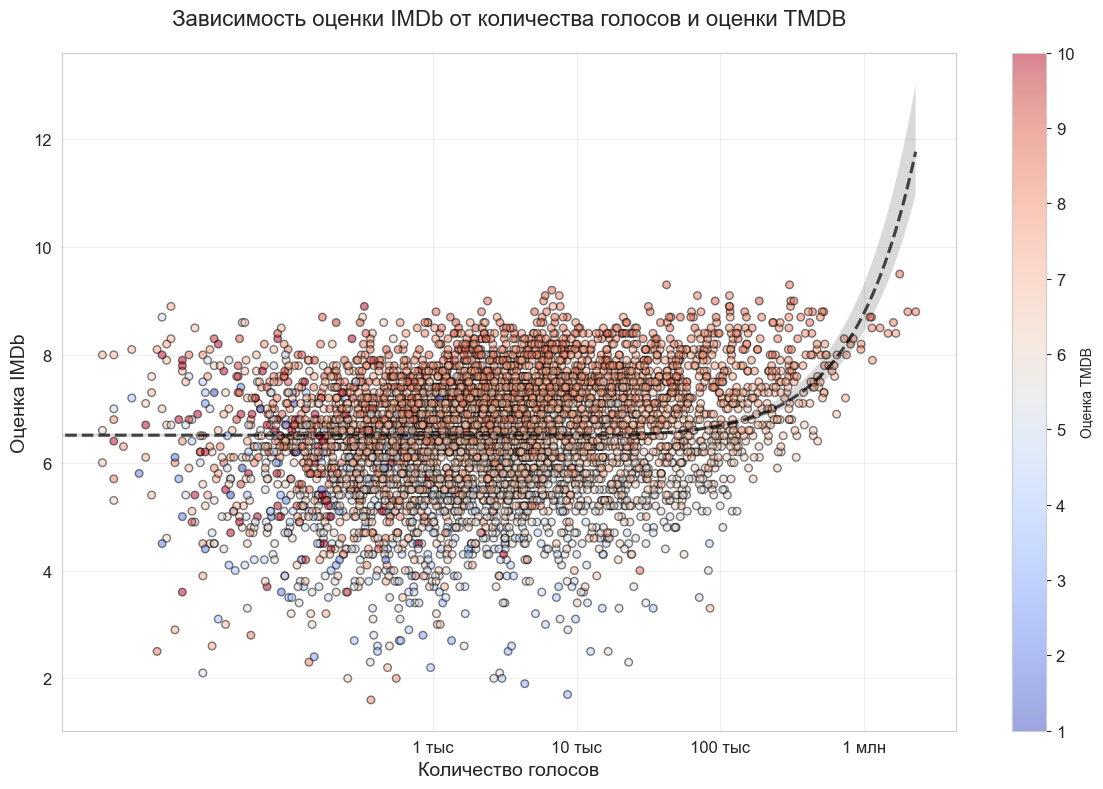

In [14]:
plt.figure(figsize=(12, 8))

plt.scatter(titles_df["imdb_votes"], titles_df["imdb_score"],
            c=titles_df["tmdb_score"],
            edgecolors='k',
            alpha=0.5,
            s=30,
            cmap="coolwarm")

# Добавляем сглаживающую линию (регрессию)
sns.regplot(x="imdb_votes", y="imdb_score",
            data=titles_df,
            scatter=False,
            color='black',
            line_kws={'linestyle':'--', 'alpha':0.7})

plt.grid(True, alpha=0.3)
cbar = plt.colorbar(label="Оценка TMDB")
cbar.ax.tick_params(labelsize=12)

plt.title("Зависимость оценки IMDb от количества голосов и оценки TMDB", fontsize=16, pad=20)
plt.xlabel("Количество голосов", fontsize=14)
plt.ylabel("Оценка IMDb", fontsize=14)
plt.xscale("log")

plt.xticks([1e3, 1e4, 1e5, 1e6],
           ['1 тыс', '10 тыс', '100 тыс', '1 млн'],
           fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

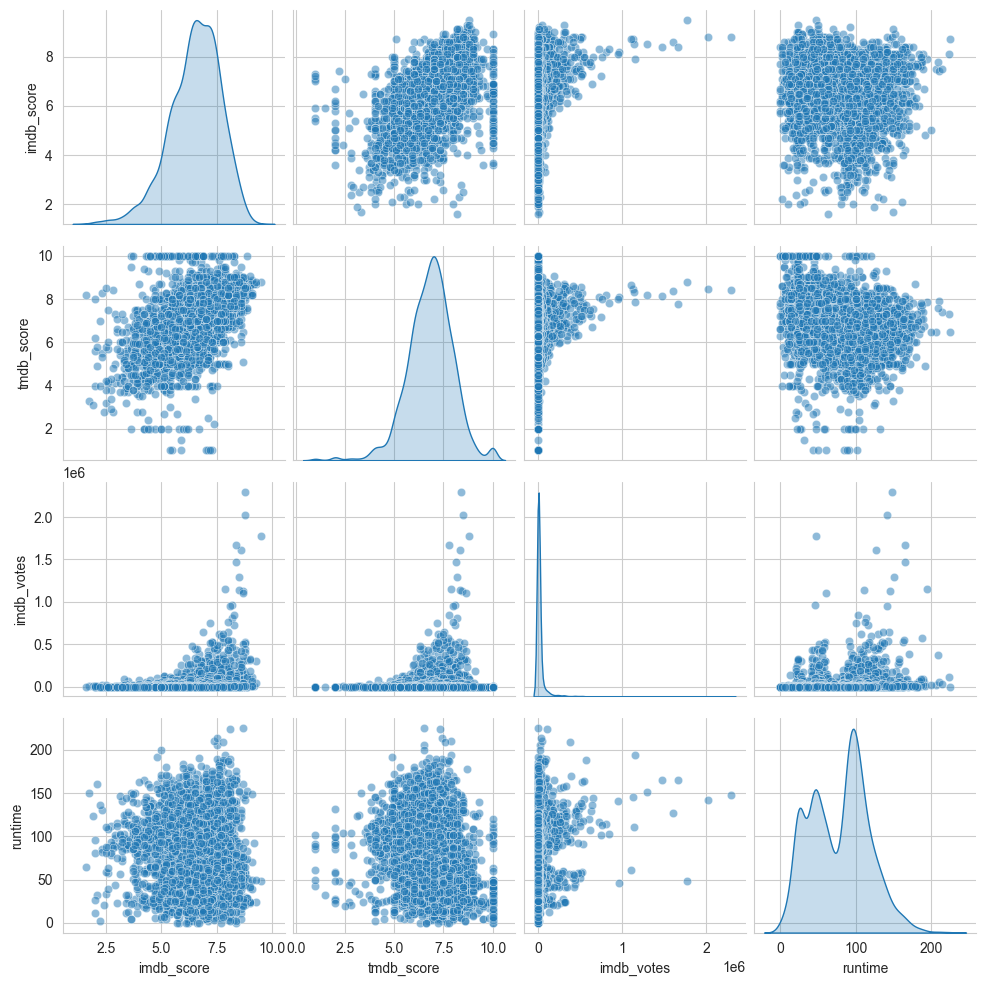

In [15]:
# Выбираем нужные числовые колонки
selected_columns = ["imdb_score", "tmdb_score", "imdb_votes", "runtime"]
pairplot_df = titles_df[selected_columns].dropna()

# Строим pairplot
sns.pairplot(pairplot_df, diag_kind="kde", plot_kws={'alpha': 0.5})

plt.show()

Для предсказания оуенки фильма (imdb_score) мы выбрали градиентный бустинг, потому что он хорошо справляется с нелинейными зависимостями, учитывает сложные взаимодействия между признаками и хорошо масштабируется.

Разделение данных:

In [16]:
from sklearn.model_selection import train_test_split

# Выбираем признаки
features = ["release_year", "runtime", "tmdb_popularity", "imdb_votes", 
            "avg_actor_popularity", "num_actors", "has_top_actor"] + \
            [f"genre_{g}" for g in unique_genres] + \
            [f"country_{c}" for c in unique_countries]

X = titles_df[features]
y = titles_df["imdb_score"]

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер train: {X_train.shape}, Размер test: {X_test.shape}")

Размер train: (4294, 137), Размер test: (1074, 137)


Обучение модели:

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Нормализация числовых данных
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, [f"genre_{g}" for g in unique_genres] + 
                                           [f"country_{c}" for c in unique_countries])
    ]
)

# Градиентный бустинг с GridSearch
gb = Pipeline(steps=[("preprocessor", preprocessor), 
                     ("model", GradientBoostingRegressor(random_state=42))])

param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5],
}

grid_search = GridSearchCV(gb, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Лучшие параметры: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 0.6849
MSE: 0.8741
R2: 0.3734


Сравним градиентный бустинг с линейной регрессией:

In [18]:
from sklearn.linear_model import LinearRegression

# Обучение линейной регрессии
lr = Pipeline(steps=[("preprocessor", preprocessor), 
                     ("model", LinearRegression())])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Оценка линейной регрессии
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

MAE: 0.8094
MSE: 1.1194
R²: 0.1976


Покажем, что линейная регрессия справляется хуже, чем градиентный бустинг:

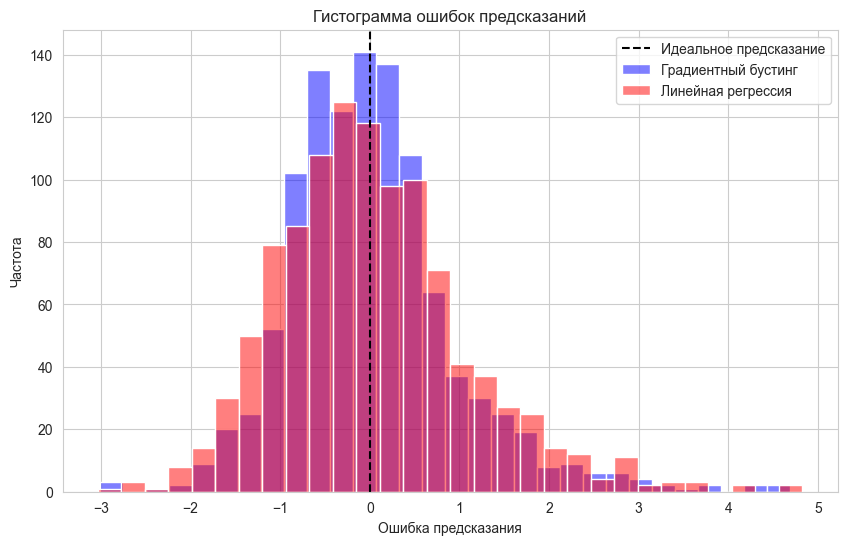

In [19]:
import seaborn as sns

# Вычисляем ошибки предсказаний
errors_gb = y_pred - y_test  # Ошибки градиентного бустинга
errors_lr = y_pred_lr - y_test  # Ошибки линейной регрессии

# Строим гистограмму ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors_gb, bins=30, color="blue", alpha=0.5, label="Градиентный бустинг")
sns.histplot(errors_lr, bins=30, color="red", alpha=0.5, label="Линейная регрессия")

plt.axvline(0, color="black", linestyle="--", label="Идеальное предсказание")
plt.xlabel("Ошибка предсказания")
plt.ylabel("Частота")
plt.title("Гистограмма ошибок предсказаний")
plt.legend()
plt.show()

Кластеризация фильмов по признакам

Цель:
Мы хотим автоматически разделить фильмы на группы (кластеры), основываясь на количественных характеристиках. Это позволяет понять, какие типы фильмов существуют в датасете, какие у них общие свойства, и как можно использовать эту информацию, например, для рекомендаций или анализа рынка.

Используемые признаки:
runtime — длительность фильма;
release_year — год выхода;
tmdb_popularity — популярность на TMDb;
tmdb_score — рейтинг TMDb;
imdb_score — рейтинг IMDb;
imdb_votes — количество голосов на IMDb.

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Объединение таблиц
credits_df = credits_df.rename(columns={"id": "id", "name": "actor_name"})
merged_df = pd.merge(titles_df, credits_df, how="left", on="id")

# Выбор признаков
cluster_features = merged_df[[
    "runtime", "release_year", "tmdb_popularity", "tmdb_score", "imdb_score", "imdb_votes"
]].dropna()

Предобработка данных: мы выбрали числовые признаки и привели их к одному масштабу с помощью StandardScaler.

In [21]:
# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

Кластеризация: применили алгоритм KMeans с 4 кластерами. Число кластеров выбрано эмпирически.

In [22]:
# Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_features["cluster"] = cluster_labels

Оценка качества: использовали метрику Silhouette Score, которая показывает, насколько хорошо объекты распределены по кластерам.

In [23]:
# Оценка силуэта
sil_score = silhouette_score(X_scaled, cluster_labels)

Визуализация: применили PCA для снижения размерности и визуализации кластеров на плоскости.

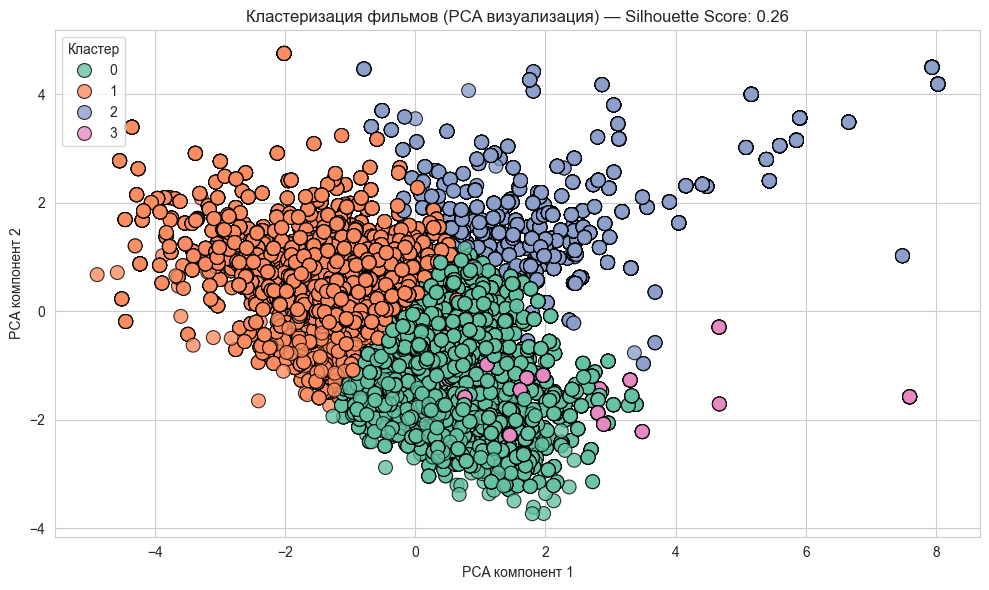

In [24]:
# PCA визуализация
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Построение графика
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2", s=100, alpha=0.8, edgecolor='k')
plt.title(f"Кластеризация фильмов (PCA визуализация) — Silhouette Score: {sil_score:.2f}")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.grid(True)
plt.legend(title="Кластер")
plt.tight_layout()
plt.show()

На графике видно, что алгоритм выделил несколько чётко различимых групп фильмов. Это может означать, что фильмы действительно имеют различия по характеристикам — например, короткие малопопулярные фильмы, длинные популярные, высокооценённые и т.д.
Silhouette Score показал, что разделение достаточно чёткое и информативное.

Общие данные про кластеры:
Кластер 0:
        - Средняя длительность фильма: 83.0 мин
        - Средний рейтинг IMDb: 7.1
        - Средний рейтинг TMDb: 7.4
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 1:
        - Средняя длительность фильма: 103.0 мин
        - Средний рейтинг IMDb: 5.6
        - Средний рейтинг TMDb: 5.9
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 2:
        - Средняя длительность фильма: 131.8 мин
        - Средний рейтинг IMDb: 7.4
        - Средний рейтинг TMDb: 7.2
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 3:
        - Средняя длительность фильма: 93.6 мин
        - Средний рейтинг IMDb: 6.6
        - Средний рейтинг TMDb: 7.3
        - Популярные жанры: нет данных
------------------------------------------------------------


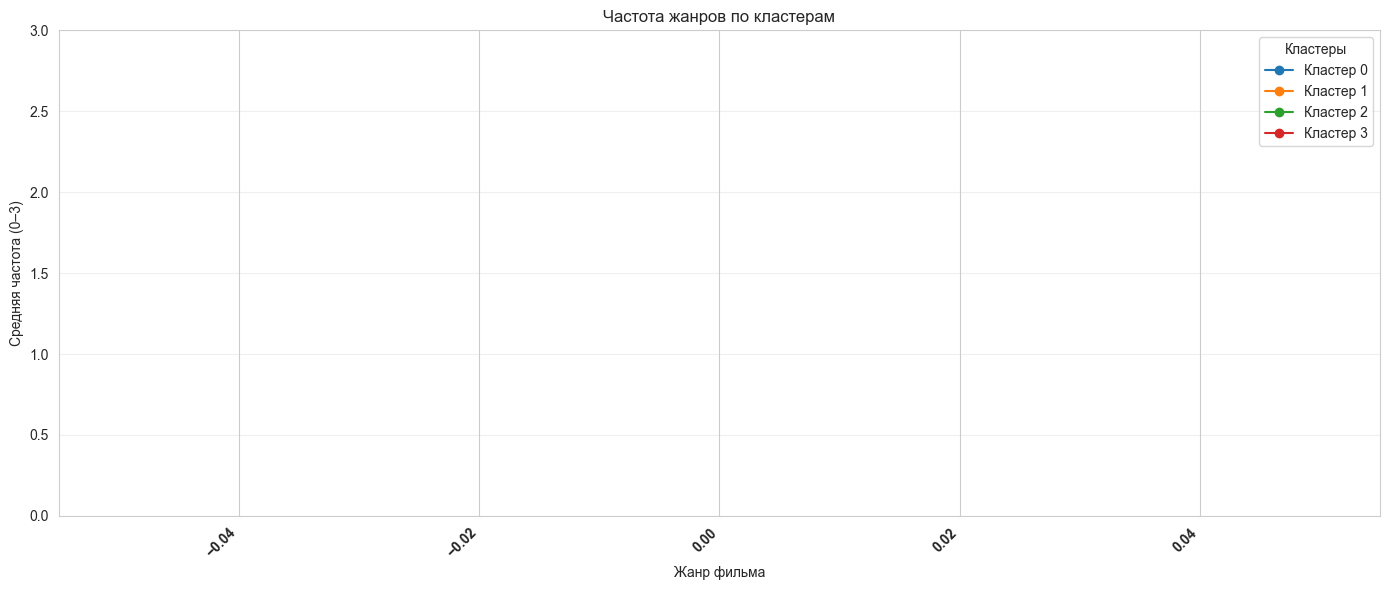

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример загрузки данных
# titles_df = pd.read_csv("titles.csv")
# credits_df = pd.read_csv("credits.csv")

# Объединение таблиц (если это нужно)
# merged_df = pd.merge(titles_df, credits_df, how="left", on="id")

# Предполагаем, что у нас уже есть dataframe с кластерами
# cluster_features - это DataFrame с признаками для кластеризации, включая 'cluster'

# Определение переменной frequency_cols — список с названиями столбцов, которые содержат частоты жанров
# Например, если в твоих данных есть колонки с частотами жанров, как 'Action', 'Drama', 'Comedy' и т.д.
frequency_cols = [col for col in cluster_features.columns if 'Frequency' in col]

# Вычисляем средние значения для каждого кластера по основным характеристикам
summary = cluster_features.groupby('cluster')[['runtime', 'imdb_score', 'tmdb_score']].mean()

# Вычисляем средние значения для каждого кластера по жанрам
genre_distribution = cluster_features.groupby('cluster')[frequency_cols].mean()

# Функция для получения наиболее популярных жанров в кластере
def top_genres(row, n=3):
    top = row.dropna().sort_values(ascending=False).head(n)
    return [col.split('[')[-1].replace(']', '') for col in top.index]

# Функция для интерпретации кластера
def interpret_cluster(cluster_id, means_row, genre_row):
    genres = top_genres(genre_row)
    return f"""Кластер {cluster_id}:
        - Средняя длительность фильма: {means_row['runtime']:.1f} мин
        - Средний рейтинг IMDb: {means_row['imdb_score']:.1f}
        - Средний рейтинг TMDb: {means_row['tmdb_score']:.1f}
        - Популярные жанры: {', '.join(genres) if genres else 'нет данных'}
        """.strip()

# Печать общей информации по кластерам
print("Общие данные про кластеры:")
for cluster_id in summary.index:
    if cluster_id in genre_distribution.index:
        desc = interpret_cluster(
            cluster_id,
            summary.loc[cluster_id],
            genre_distribution.loc[cluster_id]
        )
        print(desc)
        print('-' * 60)

# Визуализация жанров для каждого кластера
plt.figure(figsize=(14, 6))
for cluster_id, row in genre_distribution.iterrows():
    genres = row.index.str.extract(r'Frequency\[(.*)\]')[0]  # Извлекаем жанры из названий колонок
    plt.plot(genres, row.values, marker='o', label=f'Кластер {cluster_id}')

plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.title('Частота жанров по кластерам')
plt.xlabel('Жанр фильма')
plt.ylabel('Средняя частота (0–3)')
plt.ylim(0, 3)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Кластеры')
plt.tight_layout()
plt.show()